In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
data.shape

(30, 17)

In [4]:
# we can see the data set is not that big so we cannot afford any data loss.

In [5]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [6]:
# we will try to understand if there are any outliers.

In [7]:
# EDA

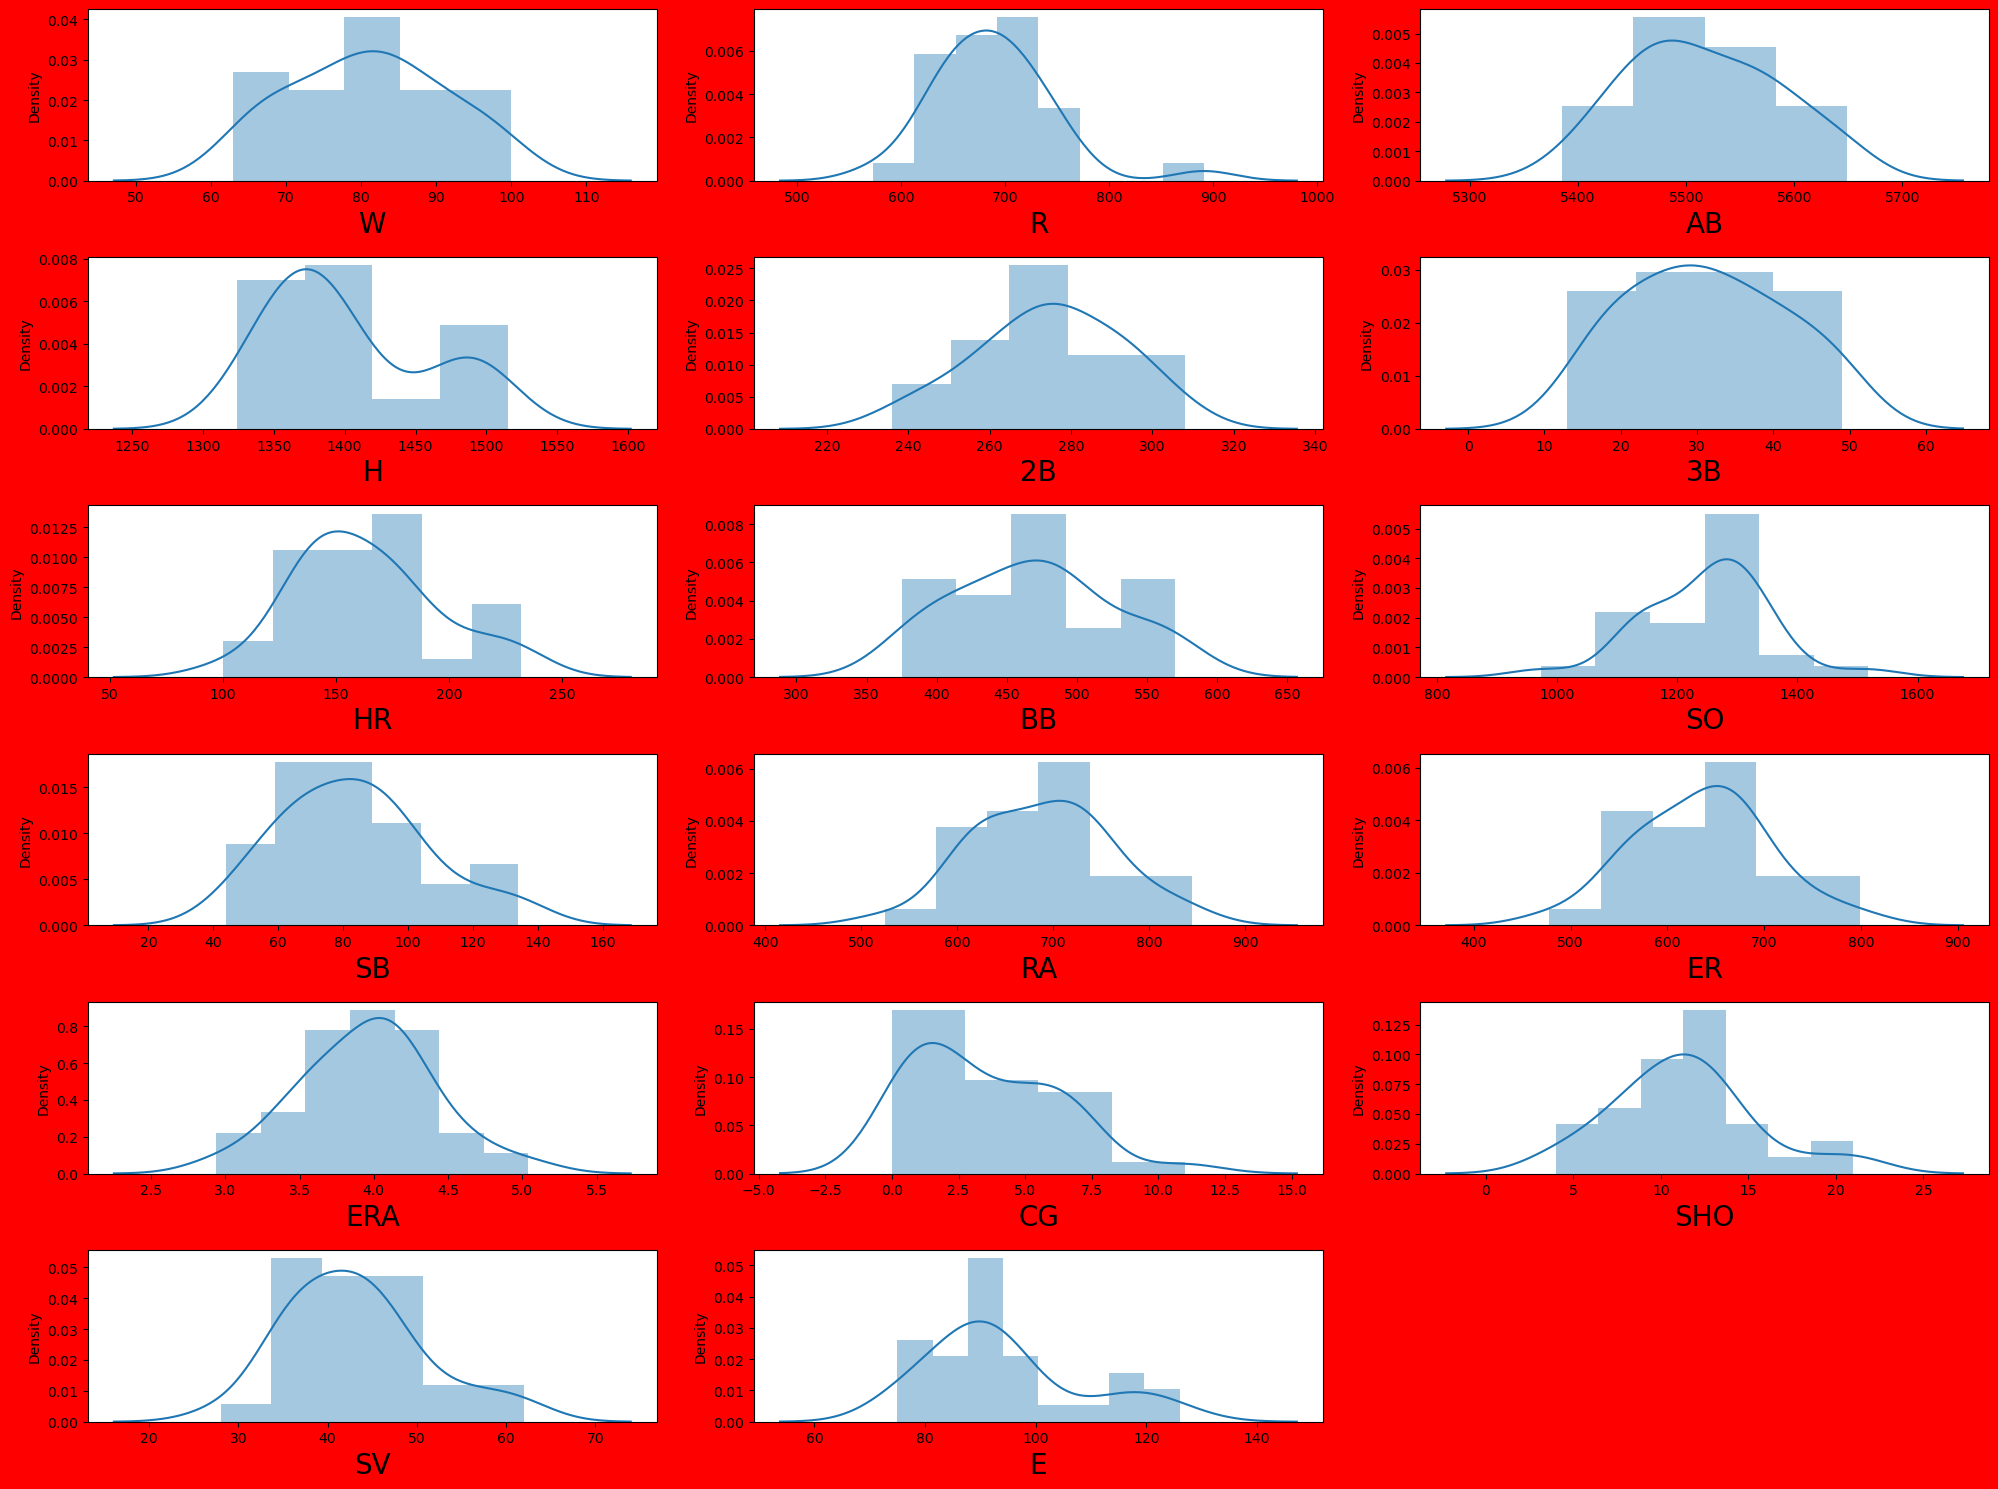

In [8]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [9]:
# Checking outliers

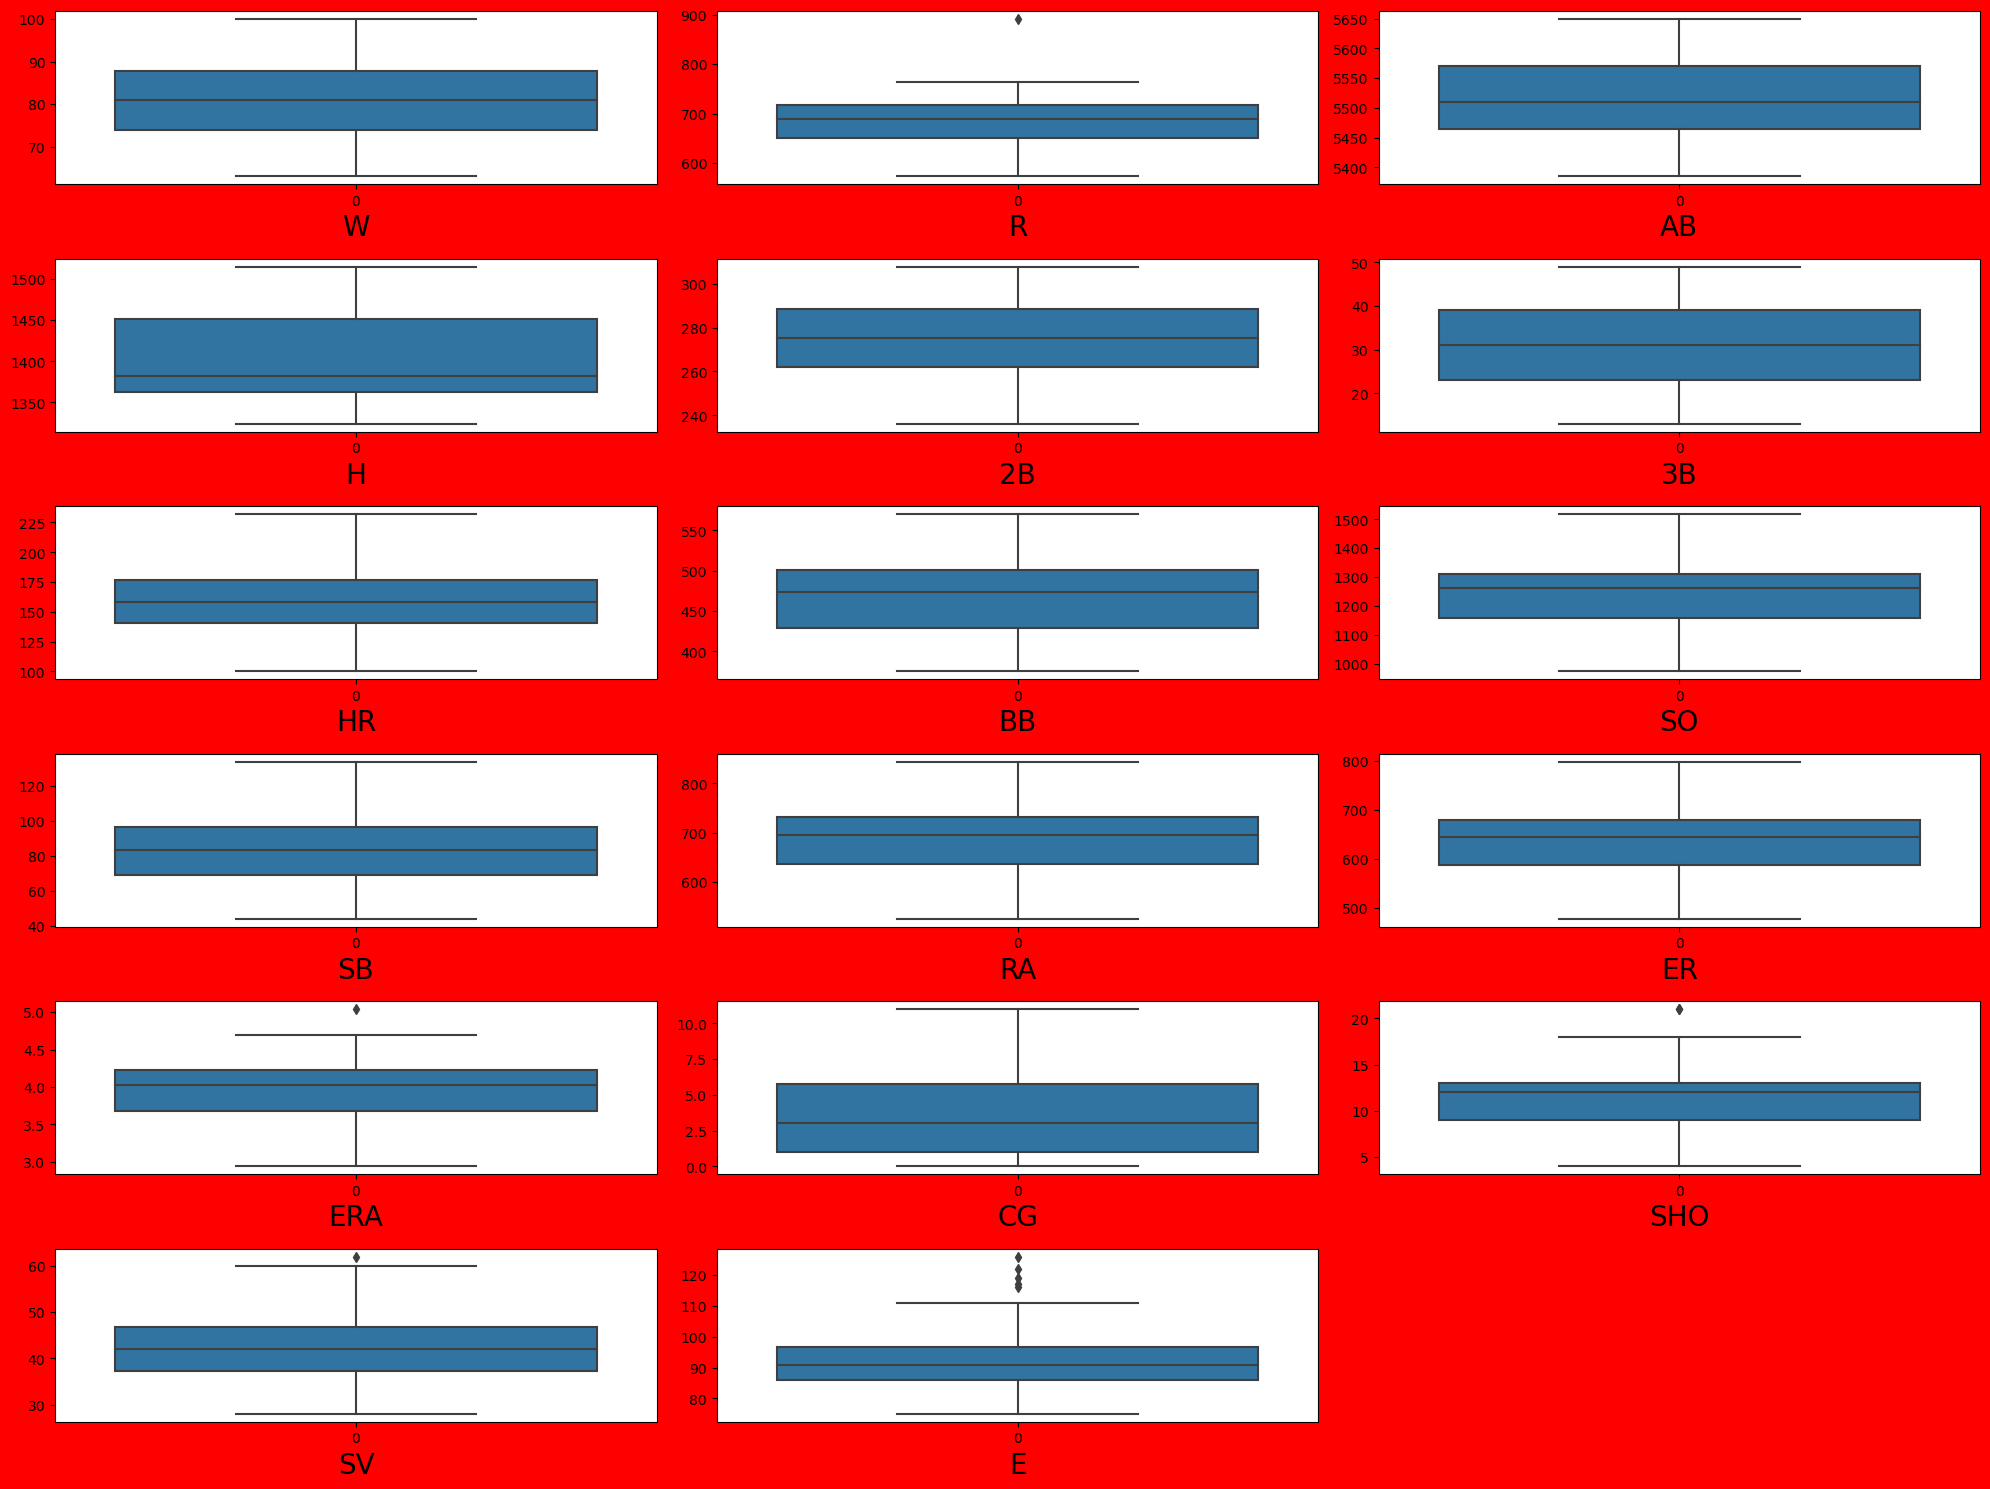

In [10]:
plt.figure(figsize=(20,15), facecolor='red')
graph = 1

for column in data:
    if graph<=17:
        plt.subplot(6,3,graph)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.tight_layout()

In [11]:
# We see that outliers here so we have to treate those outliers in a way that we do not loose the data as the data set is very small.

In [12]:
def find_boundaries(df, variables):
    Q1 = df[variables].quantile(.25)
    Q3 = df[variables].quantile(.75)
    IQR = Q3 - Q1
    lower_boundry = Q1 -1.5* IQR
    upper_boundry = Q3 + 1.5*IQR
    
    return lower_boundry , upper_boundry

In [13]:
lower_r, upper_r = find_boundaries(data,'R')
print('upper limit for R is', upper_r)
print('lower limit for R is', lower_r)

upper limit for R is 818.75
lower limit for R is 550.75


In [14]:
data['R'] = np.where(data['R'] > upper_r,upper_r,
                    np.where(data['R'] < lower_r, lower_r , data['R']))


In [15]:
# Treating outliers of SHO

In [16]:
# Here I used the capping varible at upper and lower limits . Simmilarly will be using this method to treate the rest if the outliers.

In [17]:
lower_sho, upper_sho = find_boundaries(data,'SHO')
print('upper limit for SHO is', upper_sho)
print('lower limit for SHO is', lower_sho)

upper limit for SHO is 19.0
lower limit for SHO is 3.0


In [18]:
data['SHO'] = np.where(data['SHO'] > upper_sho,upper_sho,
                    np.where(data['SHO'] < lower_sho, lower_sho , data['SHO']))

In [19]:
# Treating outliers of ERA.

In [20]:
lower_era, upper_era = find_boundaries(data,'ERA')
print('upper limit for ERA is', upper_era)
print('lower limit for ERA is', lower_era)

upper limit for ERA is 5.026250000000001
lower limit for ERA is 2.8762499999999993


In [21]:
data['ERA'] = np.where(data['ERA'] > upper_era,upper_era,
                    np.where(data['ERA'] < lower_era, lower_era , data['ERA']))

In [22]:
# Now treating outliers of SV

In [23]:
lower_sv, upper_sv = find_boundaries(data,'SV')
print('upper limit for SV is', upper_sv)
print('lower limit for SV is', lower_sv)

upper limit for SV is 61.0
lower limit for SV is 23.0


In [24]:
data['SV'] = np.where(data['SV'] > upper_sv,upper_sv,
                    np.where(data['SV'] < lower_sv, lower_sv , data['SV']))

In [25]:
# Treating the outliers of E.

In [26]:
lower_e, upper_e = find_boundaries(data,'E')
print('upper limit for E is', upper_e)
print('lower limit for E is', lower_e)

upper limit for E is 112.875
lower limit for E is 69.875


In [27]:
data['E'] = np.where(data['E'] > upper_e,upper_e,
                    np.where(data['E'] < lower_e, lower_e , data['E']))

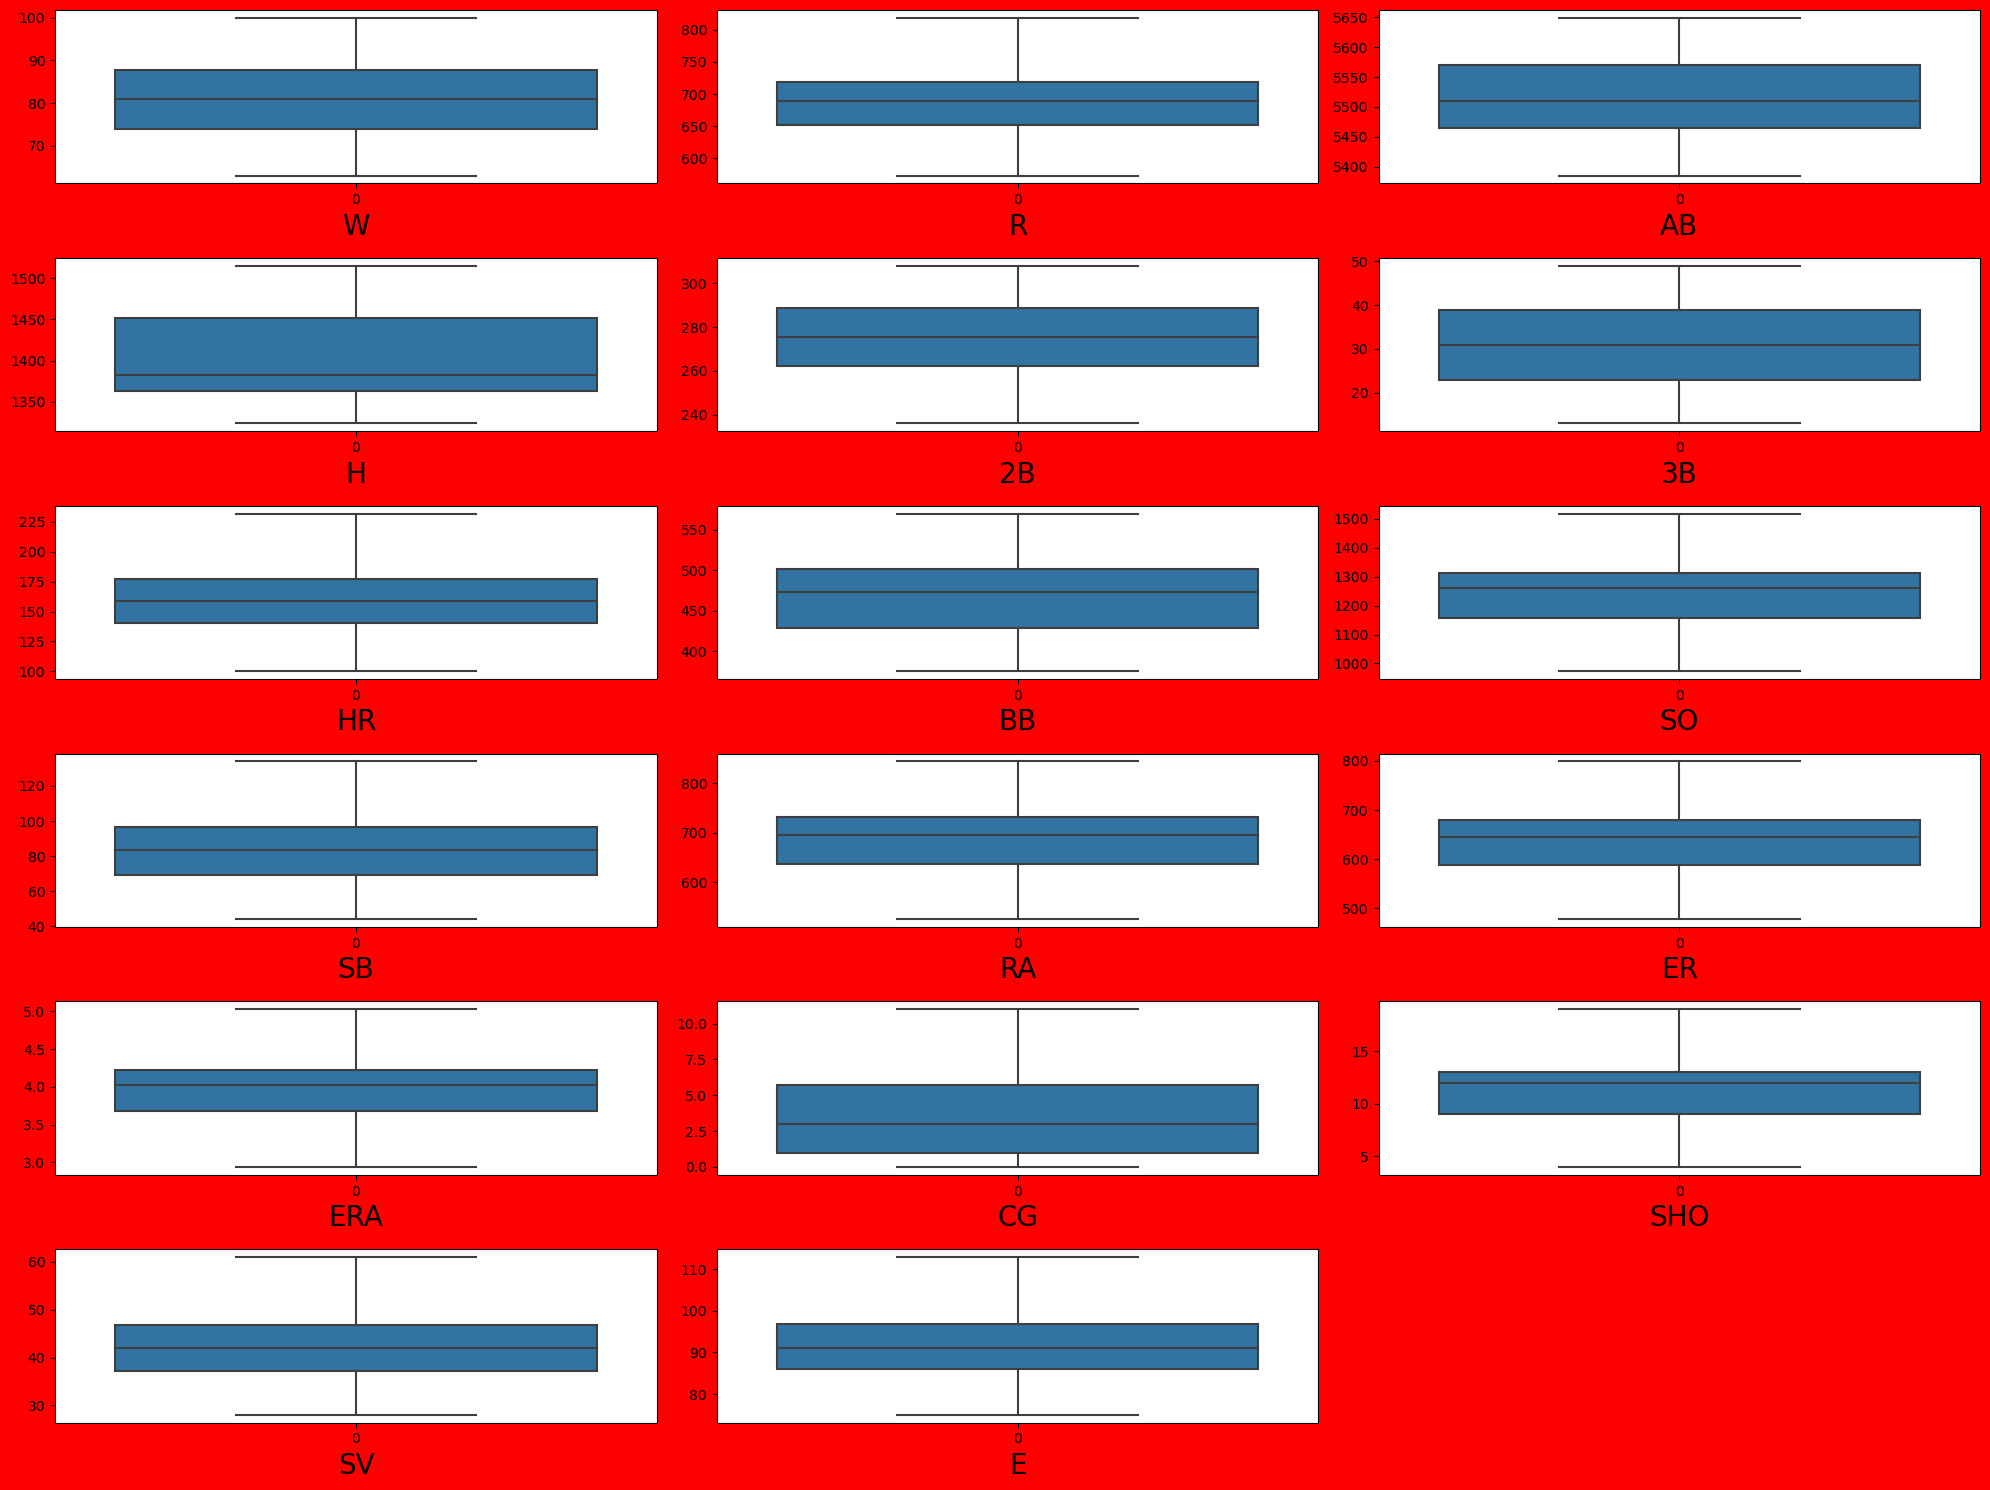

In [28]:
plt.figure(figsize=(20,15), facecolor='red')
graph = 1

for column in data:
    if graph<=17:
        plt.subplot(6,3,graph)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.tight_layout()

In [29]:
# Here we can see all the outliers have been treated.

In [30]:
# Divide data into features and lable.

In [31]:
y = data['W']
x = data.drop(columns = ['W'])

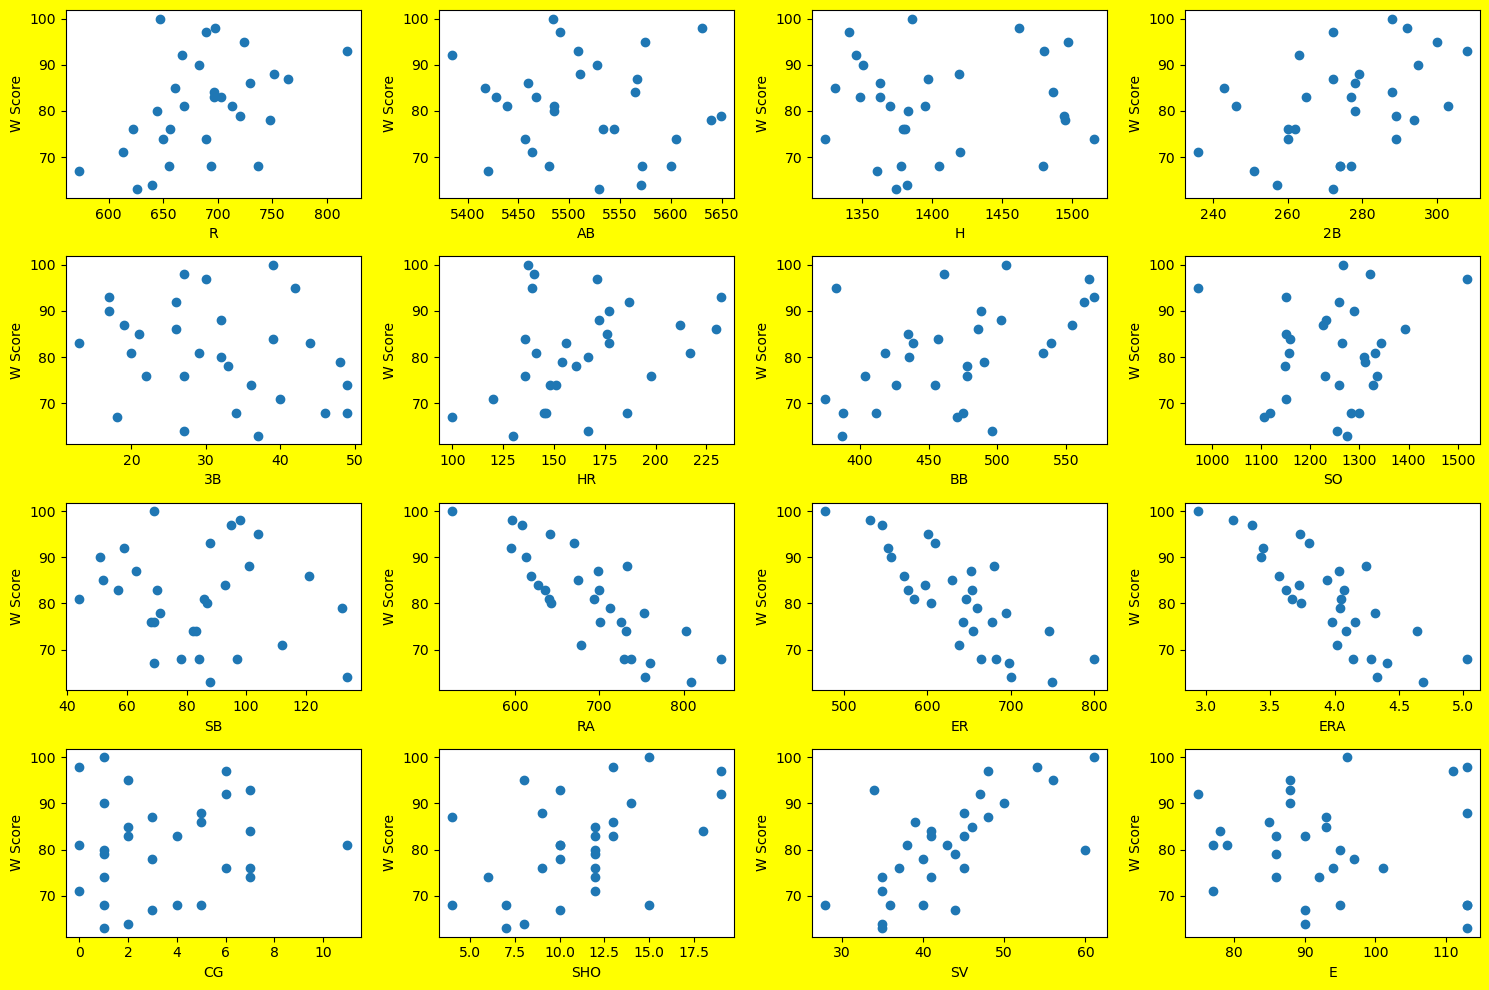

In [32]:
plt.figure(figsize = (15,10), facecolor = 'yellow')
plotnumber = 1

for column in x:
    if plotnumber<=17 :
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('W Score',fontsize=10)
    plotnumber+=1
    
plt.tight_layout()

In [33]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724.00,5575,1497,300,42,139,383,973,104,641,601,3.73000,2,8.0,56.0,88.000
1,696.00,5467,1349,277,44,156,439,1264,70,700,653,4.07000,2,12.0,45.0,86.000
2,669.00,5439,1395,303,29,141,533,1157,86,640,584,3.67000,11,10.0,38.0,79.000
3,622.00,5533,1381,260,27,136,404,1231,68,701,643,3.98000,7,9.0,37.0,101.000
4,689.00,5605,1515,289,49,151,455,1259,83,803,746,4.64000,7,12.0,35.0,86.000
5,818.75,5509,1480,308,17,232,570,1151,88,670,609,3.80000,7,10.0,34.0,88.000
6,764.00,5567,1397,272,19,212,554,1227,63,698,652,4.03000,3,4.0,48.0,93.000
7,713.00,5485,1370,246,20,217,418,1331,44,693,646,4.05000,0,10.0,43.0,77.000
8,644.00,5485,1383,278,32,167,436,1310,87,642,604,3.74000,1,12.0,60.0,95.000
9,748.00,5640,1495,294,33,161,478,1148,71,753,694,4.31000,3,10.0,40.0,97.000


In [34]:
x = x.drop(columns = ['RA','ER','R','AB','HR'])

In [35]:
#data scaling.

In [36]:
# Data scaling.
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled

array([[ 1.66368512,  1.42017307,  1.04119304, -1.53490242, -2.69762957,
         0.91388329, -0.50718622, -0.5398062 , -0.84415269,  1.69340239,
        -0.44746715],
       [-0.97068076,  0.12740339,  1.23580856, -0.5365919 ,  0.15487844,
        -0.60182558,  0.25625955, -0.5398062 ,  0.22214544,  0.25683995,
        -0.6213815 ],
       [-0.15189137,  1.58879521, -0.22380785,  1.13914361, -0.89398189,
         0.11144918, -0.64191194,  2.77264091, -0.31100362, -0.65733615,
        -1.23008175],
       [-0.40108814, -0.82812203, -0.41842337, -1.16053598, -0.16860185,
        -0.69098493,  0.05417097,  1.3004422 , -0.57757816, -0.78793273,
         0.68297617],
       [ 1.98408098,  0.80189192,  1.72234737, -0.25136033,  0.10586628,
        -0.02228984,  1.53615393,  1.3004422 ,  0.22214544, -1.0491259 ,
        -0.6213815 ],
       [ 1.36108904,  1.86983209, -1.39150098,  1.79874163, -0.95279649,
         0.20060853, -0.3500062 ,  1.3004422 , -0.31100362, -1.17972249,
        -0.447

In [37]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

vif

,vif,Features
0,2.833907,H
1,3.019364,2B
2,2.570780,3B
3,2.535380,BB
4,1.477744,SO
5,1.662964,SB
6,4.590686,ERA
7,2.017473,CG
8,2.747782,SHO
9,2.305101,SV


In [ ]:
 #Now we will do train, test, split.

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size = 0.25, random_state = 355)

In [39]:
# Model building.

In [40]:
y_train.head()

12     85
6      87
15    100
28     74
23     67
Name: W, dtype: int64

In [41]:
regression = LinearRegression()

regression.fit(x_train, y_train)

LinearRegression()

In [47]:
x.tail(2)

,H,2B,3B,BB,SO,SB,ERA,CG,SHO,SV,E
28,1324,260,36,426,1327,82,4.09000,1,6.0,41.0,92.0
29,1479,274,49,388,1283,97,5.02625,4,4.0,36.0,95.0


In [48]:
regression.predict(scaler.transform([[1324, 260, 36, 426, 1327, 82, 4.09000, 1, 6.0, 41.0, 92.0]]))

array([75.28370956])

In [54]:
# How our model perform with test data .

In [49]:
regression.score(x_test,y_test)

-0.28298101138256526

In [50]:
regression.score(x_train,y_train)

0.9087329570248787

In [51]:
y_pred = regression.predict(x_test)

In [52]:
y_pred

array([75.85644409, 74.8517523 , 80.7320788 , 82.63881334, 85.94114827,
       77.65510627, 72.97890743, 78.53297828])

In [53]:
from sklearn.metrics import r2_score

In [54]:
# R-Square score

In [55]:
predictions = regression.predict(x_test)

In [56]:
r2 = r2_score(y_test, predictions)

In [57]:
print(f'R-sqared: {r2}')

R-sqared: -0.28298101138256526
